* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)2)
* DiabetesPedigreeFunction - gives the likelihood of a person being diabetic based on family history.
* Age: Age (years)
* Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Descriptive statistics:-

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Let us analyse each feature w.r.t our target variable, the outcome.  

We will be dropping the rows where number of pregnanices are greater than 14.

## Let us analyze each feature separately.

# Pregnancies:-

In [5]:
data['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

Pregnancies feature denotes number of times a patient has been pregnant. 
Observations:-

* Maximum value for pregnany is 17, which is very unlikely. We need to deal with the outliers over here

In [6]:
# function to remove outliers:-    
sorted(data['Pregnancies'])
q1 , q3 = np.percentile(data['Pregnancies'],[25,75])
IQR = q3 - q1
lower = q1 - (1.5*IQR)
upper = q3 + (1.5*IQR)
data['Pregnancies'] = data['Pregnancies'][(data['Pregnancies'] > lower) & (data['Pregnancies'] < upper)]

In [7]:
# Replcaing the nan values with mean:-
data['Pregnancies'] = data['Pregnancies'].replace(np.nan,4)
data['Pregnancies'].unique() # Outliers have been removed.

array([ 6.,  1.,  8.,  0.,  5.,  3., 10.,  2.,  4.,  7.,  9., 11., 13.,
       12.])

# Glucose:-

In [8]:
data['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

Let's check the average glucose levels in healthy and diabetic patients. We will fill the 0 values with these accordingly,

In [9]:
data['Glucose'].groupby(data['Outcome']).median()

Outcome
0    107
1    140
Name: Glucose, dtype: int64

In [10]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'] == 0), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'] == 0), 'Glucose'] = 140
data['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,  62, 131, 112, 113,  74,  83, 136,  80,
       123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160, 124,
       162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188, 152,
       104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,  91,
       165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98, 127,
        82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174, 199,
        56, 169, 149,  65, 190], dtype=int64)

In [11]:
# Outlier removal:-
sorted(data['Glucose'])
q1 , q3 = np.percentile(data['Glucose'],[25,75])
IQR = q3 - q1
lower = q1 - (1.5*IQR)
upper = q3 + (1.5*IQR)
data['Glucose'] = data['Glucose'][(data['Glucose'] > lower) & (data['Glucose'] < upper)]

data['Glucose'].value_counts() # Outliers have been removed.

100    17
99     17
111    14
107    14
129    14
       ..
182     1
186     1
190     1
191     1
44      1
Name: Glucose, Length: 135, dtype: int64

# BloodPressure:-

As we can see below, the same problem arises. We will deal with it in a similar manner.

In [12]:
data['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [13]:
data['BloodPressure'].groupby(data['Outcome']).median()

Outcome
0    70
1    74
Name: BloodPressure, dtype: int64

In [14]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'] == 0), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'] == 0), 'BloodPressure'] = 74
data['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,  70,  96,  92,  80,  60,  84,  30,
        88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,  85,
        86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,  46,
       102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [15]:
# Outlier removal:-
sorted(data['BloodPressure'])
q1 , q3 = np.percentile(data['BloodPressure'],[25,75])
IQR = q3 - q1
lower = q1 - (1.5*IQR)
upper = q3 + (1.5*IQR)
data['BloodPressure'] = data['BloodPressure'][(data['BloodPressure'] > lower) & (data['BloodPressure'] < upper)]

data['BloodPressure'] = data['BloodPressure'].replace(np.nan,70)
data['BloodPressure'].value_counts() # Outliers have been removed.

70.0     93
74.0     68
68.0     45
78.0     45
72.0     44
64.0     43
80.0     40
76.0     39
60.0     37
62.0     34
66.0     30
82.0     30
88.0     25
84.0     23
90.0     22
58.0     21
86.0     21
50.0     13
56.0     12
52.0     11
54.0     11
75.0      8
92.0      8
65.0      7
94.0      6
85.0      6
48.0      5
44.0      4
96.0      4
100.0     3
98.0      3
55.0      2
46.0      2
95.0      1
102.0     1
61.0      1
Name: BloodPressure, dtype: int64

# Insulin:-

In [16]:
data['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [17]:
data['Insulin'].groupby(data['Outcome']).mean()

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64

In [18]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'] == 0), 'Insulin'] = 68
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'] == 0), 'Insulin'] = 100
data['Insulin'].unique()

array([100,  68,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146,
       115, 140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300,
       342, 304, 142, 128,  38,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  52, 255, 171,  73, 108,
        43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81, 196,
       415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95, 237,
       191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65, 166,
       274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15, 183,
        91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 392, 17

In [19]:
# Outlier removal:-
sorted(data['Insulin'])
q1 , q3 = np.percentile(data['Insulin'],[25,75])
IQR = q3 - q1
lower = q1 - (1.5*IQR)
upper = q3 + (1.5*IQR)
data['Insulin'] = data['Insulin'][(data['Insulin'] > lower) & (data['Insulin'] < upper)]

data['Insulin'] = data['Insulin'].replace(np.nan,68)
data['Insulin'].unique() # Outliers have been removed.

array([100.,  68.,  94., 168.,  88., 175.,  83.,  96., 146., 115., 140.,
       110.,  54., 192., 207.,  70.,  82.,  36.,  23., 142., 128.,  38.,
        90.,  71., 125., 176.,  48.,  64.,  76.,  40., 152.,  18., 135.,
        37.,  51.,  99., 145.,  49.,  50.,  92.,  63., 119., 204., 155.,
        53., 114., 105., 156.,  78., 130.,  55.,  58., 160., 210.,  44.,
       190.,  87., 129., 120.,  56.,  32.,  45., 194., 150.,  67.,  57.,
       116., 122.,  75.,  74., 182., 215., 184.,  42., 132., 148., 180.,
       205.,  85.,  29.,  52., 171.,  73., 108.,  43., 167.,  66.,  89.,
       158.,  84.,  72.,  59.,  81., 196., 165.,  61., 170.,  60.,  14.,
        95., 191., 193.,  79.,  86., 188., 106.,  65., 166.,  77., 126.,
       185.,  25.,  41., 144.,  15., 183.,  91.,  46., 159., 200.,  22.,
       178., 127.,  16., 112.])

# Skin Thickness:-

In [20]:
data['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [21]:
data['SkinThickness'].groupby(data['Outcome']).median()

Outcome
0    21
1    27
Name: SkinThickness, dtype: int64

In [22]:
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'] == 0), 'SkinThickness'] = 21
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'] == 0), 'SkinThickness'] = 27
data['SkinThickness'].unique()

array([35, 29, 27, 23, 21, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11,
       31, 37, 42, 25, 18, 24, 39, 34, 10, 60, 13, 20, 22, 28, 54, 40, 51,
       56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [23]:
# Outlier removal:-
sorted(data['SkinThickness'])
q1 , q3 = np.percentile(data['SkinThickness'],[25,75])
IQR = q3 - q1
lower = q1 - (1.5*IQR)
upper = q3 + (1.5*IQR)
data['SkinThickness'] = data['SkinThickness'][(data['SkinThickness'] > lower) & (data['SkinThickness'] < upper)]

# replacing nan values with mean:-

data['SkinThickness'] = data['SkinThickness'].replace(np.nan,21)
data['SkinThickness'].unique() # Outliers have been removed.

array([35., 29., 27., 23., 21., 32., 45., 19., 47., 38., 30., 41., 33.,
       26., 15., 36., 11., 31., 37., 42., 25., 18., 24., 39., 34., 10.,
       13., 20., 22., 28., 40., 14., 17., 44., 12., 46., 16.,  7., 43.,
       48.,  8.])

# BMI:-

In [24]:
data['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [25]:
data['BMI'].groupby(data['Outcome']).median()

Outcome
0    30.05
1    34.25
Name: BMI, dtype: float64

In [26]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'] == 0), 'BMI'] = 30.05
data.loc[(data['Outcome'] == 1 ) & (data['BMI'] == 0), 'BMI'] = 34.25
data['BMI'].unique()

array([33.6 , 26.6 , 23.3 , 28.1 , 43.1 , 25.6 , 31.  , 35.3 , 30.5 ,
       34.25, 37.6 , 38.  , 27.1 , 30.1 , 25.8 , 30.  , 45.8 , 29.6 ,
       43.3 , 34.6 , 39.3 , 35.4 , 39.8 , 29.  , 36.6 , 31.1 , 39.4 ,
       23.2 , 22.2 , 34.1 , 36.  , 31.6 , 24.8 , 19.9 , 27.6 , 24.  ,
       33.2 , 32.9 , 38.2 , 37.1 , 34.  , 40.2 , 22.7 , 45.4 , 27.4 ,
       42.  , 29.7 , 28.  , 39.1 , 30.05, 19.4 , 24.2 , 24.4 , 33.7 ,
       34.7 , 23.  , 37.7 , 46.8 , 40.5 , 41.5 , 25.  , 25.4 , 32.8 ,
       32.5 , 42.7 , 19.6 , 28.9 , 28.6 , 43.4 , 35.1 , 32.  , 24.7 ,
       32.6 , 43.2 , 22.4 , 29.3 , 24.6 , 48.8 , 32.4 , 38.5 , 26.5 ,
       19.1 , 46.7 , 23.8 , 33.9 , 20.4 , 28.7 , 49.7 , 39.  , 26.1 ,
       22.5 , 39.6 , 29.5 , 34.3 , 37.4 , 33.3 , 31.2 , 28.2 , 53.2 ,
       34.2 , 26.8 , 55.  , 42.9 , 34.5 , 27.9 , 38.3 , 21.1 , 33.8 ,
       30.8 , 36.9 , 39.5 , 27.3 , 21.9 , 40.6 , 47.9 , 50.  , 25.2 ,
       40.9 , 37.2 , 44.2 , 29.9 , 31.9 , 28.4 , 43.5 , 32.7 , 67.1 ,
       45.  , 34.9 ,

In [27]:
# Outlier removal:-
sorted(data['BMI'])
q1 , q3 = np.percentile(data['BMI'],[25,75])
IQR = q3 - q1
lower = q1 - (1.5*IQR)
upper = q3 + (1.5*IQR)
data['BMI'] = data['BMI'][(data['BMI'] > lower) & (data['BMI'] < upper)]

data['BMI'] = data['BMI'].replace(np.nan,25)
data['BMI'].unique() # Outliers have been removed.

array([33.6 , 26.6 , 23.3 , 28.1 , 43.1 , 25.6 , 31.  , 35.3 , 30.5 ,
       34.25, 37.6 , 38.  , 27.1 , 30.1 , 25.8 , 30.  , 45.8 , 29.6 ,
       43.3 , 34.6 , 39.3 , 35.4 , 39.8 , 29.  , 36.6 , 31.1 , 39.4 ,
       23.2 , 22.2 , 34.1 , 36.  , 31.6 , 24.8 , 19.9 , 27.6 , 24.  ,
       33.2 , 32.9 , 38.2 , 37.1 , 34.  , 40.2 , 22.7 , 45.4 , 27.4 ,
       42.  , 29.7 , 28.  , 39.1 , 30.05, 19.4 , 24.2 , 24.4 , 33.7 ,
       34.7 , 23.  , 37.7 , 46.8 , 40.5 , 41.5 , 25.  , 25.4 , 32.8 ,
       32.5 , 42.7 , 19.6 , 28.9 , 28.6 , 43.4 , 35.1 , 32.  , 24.7 ,
       32.6 , 43.2 , 22.4 , 29.3 , 24.6 , 48.8 , 32.4 , 38.5 , 26.5 ,
       19.1 , 46.7 , 23.8 , 33.9 , 20.4 , 28.7 , 49.7 , 39.  , 26.1 ,
       22.5 , 39.6 , 29.5 , 34.3 , 37.4 , 33.3 , 31.2 , 28.2 , 34.2 ,
       26.8 , 42.9 , 34.5 , 27.9 , 38.3 , 21.1 , 33.8 , 30.8 , 36.9 ,
       39.5 , 27.3 , 21.9 , 40.6 , 47.9 , 50.  , 25.2 , 40.9 , 37.2 ,
       44.2 , 29.9 , 31.9 , 28.4 , 43.5 , 32.7 , 45.  , 34.9 , 27.7 ,
       35.9 , 22.6 ,

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Hence our data cleaning and preprocessing steps are complete.

# Diabetes Pedigree Function:-

In [29]:
data['DiabetesPedigreeFunction'].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [30]:
data['DiabetesPedigreeFunction'].groupby(data['Outcome']).median()

Outcome
0    0.336
1    0.449
Name: DiabetesPedigreeFunction, dtype: float64

In [31]:
data.loc[(data['DiabetesPedigreeFunction'] > 1) & (data['Outcome'] == 0),'DiabetesPedigreeFunction'] = 0.336
data.loc[(data['DiabetesPedigreeFunction'] > 1) & (data['Outcome'] == 1),'DiabetesPedigreeFunction'] = 0.449
data['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 0.449, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 0.336, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 0.271, 0.696, 0.235, 0.721, 0.294, 0.564, 0.586,
       0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718, 0.962, 0.173,
       0.304, 0.27 , 0.699, 0.258, 0.203, 0.855, 0.845, 0.334, 0.189,
       0.867, 0.411, 0.583, 0.231, 0.396, 0.14 , 0.391, 0.37 , 0.307,
       0.102, 0.767, 0.237, 0.227, 0.698, 0.178, 0.324, 0.153, 0.165,
       0.443, 0.261, 0.277, 0.761, 0.255, 0.13 , 0.323, 0.356, 0.325,
       0.179, 0.262, 0.283, 0.93 , 0.801, 0.207, 0.287, 0.247, 0.199,
       0.543, 0.192, 0.588, 0.539, 0.22 , 0.654, 0.223, 0.759, 0.26 ,
       0.404, 0.186, 0.278, 0.496, 0.452, 0.403, 0.741, 0.361, 0.457,
       0.647, 0.088, 0.597, 0.532, 0.703, 0.159, 0.268, 0.286, 0.318,
       0.272, 0.572,

<AxesSubplot:>

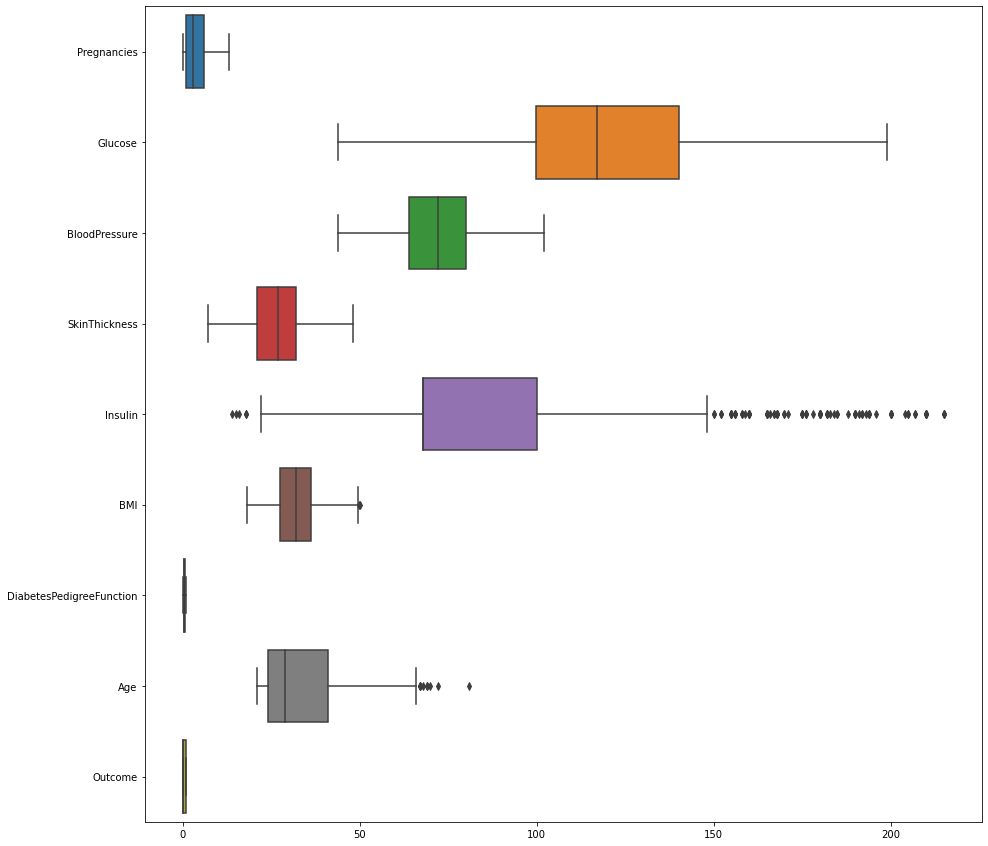

In [32]:
# Outlier detection:-
plt.figure(figsize=(15,15))
sns.boxplot(data=data,orient='h')

<AxesSubplot:>

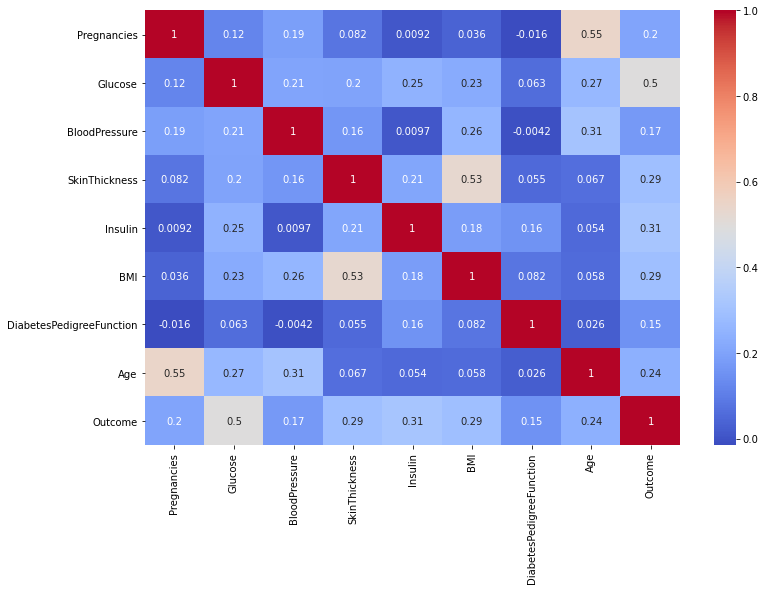

In [33]:
matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(matrix,annot=True,cmap='coolwarm')

Most the features have significant positive correlation with the target. There is also no apparent multicollinearity between the features.

# Training a model:-

I will be creating 2 label columns. One for the Outcome andanother for the Diabetes Pedigree Function. A classifier will be used to predict the outcomes and a regression model will be used to predict the pedigree function, or how likely the patient is to be diabetic in the future. The webapp will be returning both these values 

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [35]:
# Importing sklearn and other modules:-

from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report , confusion_matrix

In [36]:
X = data.drop(['Outcome','DiabetesPedigreeFunction'],axis=1)
y = data['Outcome']
pedigree_labels = data['DiabetesPedigreeFunction']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.1,random_state=101)

# For pedigree values:
features_train, features_test, ped_train, ped_test = train_test_split(X,pedigree_labels,test_size=0.1,random_state=101)

In [73]:
X.SkinThickness.min()

7.0

Feature scaling:-

In [37]:
# For outcome:
X_scaler = StandardScaler()

# For pedigree labels:
features_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

features_train_scaled = features_scaler.fit_transform(features_train)
features_test_scaled = features_scaler.transform(features_test)

# Logistic Regression:-

In [38]:
log_model = LogisticRegression()

log_model.fit(X_train_scaled,y_train)
log_pred = log_model.predict(X_test_scaled)

print(classification_report(y_test,log_pred))
print(confusion_matrix(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        53
           1       0.76      0.67      0.71        24

    accuracy                           0.83        77
   macro avg       0.81      0.79      0.80        77
weighted avg       0.83      0.83      0.83        77

[[48  5]
 [ 8 16]]


# Random Forest Classifier:-

In [39]:
rfc = RandomForestClassifier()

rfc_param_dist = {'n_estimators':[50,80,100,120,150,200,300],'max_depth':[4,8,12,16,20,24,32],
                 'max_features':["sqrt", "log2"],'criterion':['gini','entropy']}

rfc_random = RandomizedSearchCV(estimator=rfc,param_distributions=rfc_param_dist,scoring='accuracy',n_iter=10,cv=5,n_jobs=-1)

rfc_random.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 8, 12, 16, 20, 24, 32],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [50, 80, 100, 120, 150,
                                                         200, 300]},
                   scoring='accuracy')

In [40]:
rfc_random.best_params_

{'n_estimators': 50,
 'max_features': 'log2',
 'max_depth': 24,
 'criterion': 'entropy'}

In [41]:
rfc_random.best_score_

0.8639453654467729

In [42]:
rfc_final = RandomForestClassifier(n_estimators=150,
 max_features='log2',
 max_depth=16,
 criterion='gini')

rfc_final.fit(X_train_scaled,y_train)
rfc_final_pred = rfc_final.predict(X_test_scaled)

print(classification_report(y_test,rfc_final_pred))
print(confusion_matrix(y_test,rfc_final_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        53
           1       0.86      0.75      0.80        24

    accuracy                           0.88        77
   macro avg       0.88      0.85      0.86        77
weighted avg       0.88      0.88      0.88        77

[[50  3]
 [ 6 18]]


Random Forest Classifier with hyperparameter tuning gave pretty good metrics.

# Adaboost Classifier:-

In [43]:
ada_cl = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
 
ada_param_dist = {'n_estimators':[50,80,100,120,150],
                  'learning_rate':[0.05,0.1,0.5,1]}

ada_random = RandomizedSearchCV(ada_cl,param_distributions=ada_param_dist,scoring='accuracy',n_iter=10,cv=5,n_jobs=-1)
# Fitting:-
ada_random.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.5, 1],
                                        'n_estimators': [50, 80, 100, 120,
                                                         150]},
                   scoring='accuracy')

In [44]:
ada_random.best_params_

{'n_estimators': 100, 'learning_rate': 0.1}

In [45]:
ada_random.best_score_

0.8639766447711394

In [46]:
final_ada_cl = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=120,learning_rate=0.1)

final_ada_cl.fit(X_train_scaled,y_train)
ada_pred = final_ada_cl.predict(X_test_scaled)

In [47]:
print(classification_report(y_test,ada_pred))
print(confusion_matrix(y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        53
           1       0.86      0.75      0.80        24

    accuracy                           0.88        77
   macro avg       0.88      0.85      0.86        77
weighted avg       0.88      0.88      0.88        77

[[50  3]
 [ 6 18]]


# Gradient Boost Classifier:-

In [48]:
gb_c = GradientBoostingClassifier()

gb_param_dist = {'n_estimators':[80,90,100,120,140],'learning_rate':[0.01,0.05,0.1,0.5,1],'max_features':['sqrt','log2']}

gb_random = RandomizedSearchCV(gb_c,param_distributions=gb_param_dist,scoring='accuracy',cv=5,n_iter=10,n_jobs=-1)

# Fitting:-
gb_random.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [80, 90, 100, 120,
                                                         140]},
                   scoring='accuracy')

In [49]:
gb_random.best_params_

{'n_estimators': 100, 'max_features': 'sqrt', 'learning_rate': 0.1}

In [50]:
gb_random.best_score_

0.8654259201334584

In [51]:
final_gb_c = GradientBoostingClassifier(n_estimators=100,max_features='log2',learning_rate=0.1)

final_gb_c.fit(X_train_scaled,y_train)

gb_pred = final_gb_c.predict(X_test_scaled)

In [52]:
print(classification_report(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        53
           1       0.86      0.75      0.80        24

    accuracy                           0.88        77
   macro avg       0.88      0.85      0.86        77
weighted avg       0.88      0.88      0.88        77

[[50  3]
 [ 6 18]]


Gradient Boosting classifier with hyperparameter tuning gives a better accuracy of 91%, and even better precision, recall and F1 scores.

### Saving the models:-

In [53]:
import joblib

In [54]:
# Saving the GradientBoost model:-
filename = 'Gradient_Boost_classifier.sav'
joblib.dump(final_gb_c,filename)

['Gradient_Boost_classifier.sav']

In [55]:
# Saving the Adaboost model:-
ada_filename = 'Ada_Boost_classifier.sav'
joblib.dump(final_ada_cl,ada_filename)

['Ada_Boost_classifier.sav']

In [56]:
# Saving the RandomForest model:-
rf_filename = 'Random_Forest_classifier.sav'
joblib.dump(rfc_final,rf_filename)

['Random_Forest_classifier.sav']

In [65]:
# Saving the scaler for ease of use:
joblib.dump(X_scaler,'Outcome_Scaler.bin')

['Outcome_Scaler.bin']

In [66]:
joblib.dump(features_scaler,'Pedigree_fn_scaler.bin')

['Pedigree_fn_scaler.bin']

# Predicting the diabetes pedigree function:-

features_train_scaled = features_scaler.fit_transform(features_train)

features_test_scaled = features_scaler.transform(features_test)

In [57]:
rfr = RandomForestRegressor()

param_dist = {'n_estimators':[x for x in np.arange(100,800,50)],
             'criterion':['mse','mae'],
             'max_features':['sqrt','log2'],
             'min_samples_split':[2,4,6,8]}

rfr_search = RandomizedSearchCV(estimator=rfr,param_distributions=param_dist,scoring='neg_mean_squared_error',
                               n_jobs=-1,cv=10)

rfr_search.fit(features_train_scaled,ped_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750]},
                   scoring='neg_mean_squared_error')

In [58]:

rfr_model = rfr_search.best_estimator_

rfr_pred = rfr_model.predict(features_test_scaled)

In [59]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(ped_test,rfr_pred))

0.03957025679466316


# Gradient Boost regressor:-

In [60]:
gbr = GradientBoostingRegressor()

param_dist = {'n_estimators':[x for x in np.arange(100,800,50)],
             'loss':['ls','huber','lad','quantile'],
             'criterion':['mse','friedman_mse'],
             'learning_rate':[x for x in np.arange(0.25,1.0,0.25)]}

rfr_search = RandomizedSearchCV(estimator=gbr,param_distributions=param_dist,scoring='neg_mean_squared_error',
                               n_jobs=-1,cv=10)

rfr_search.fit(features_train_scaled,ped_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse'],
                                        'learning_rate': [0.25, 0.5, 0.75],
                                        'loss': ['ls', 'huber', 'lad',
                                                 'quantile'],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750]},
                   scoring='neg_mean_squared_error')

In [61]:
gbr_model = rfr_search.best_estimator_

gbr_pred = rfr_model.predict(features_test_scaled)

In [62]:
print(mean_squared_error(ped_test,gbr_pred))

0.03957025679466316


Since both random forest and Gradient Boost gave similar results upto 6 decimal places, I will be going with the simpler Random Forest model.  

In [63]:
# Model Saving:
filename = 'Random_Forest_Regressor.sav'
joblib.dump(gbr_model,filename)

['Random_Forest_Regressor.sav']